In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import scipy.stats as st
import numpy as np

#disabled 'SettingWithCopyWarning'
pd.options.mode.chained_assignment = None


In [2]:
# Data compiled by the National Skills Commission through job boards such as Seek, CareerOne and Australian JobSearch
# link- https://labourmarketinsights.gov.au/our-research/internet-vacancy-index/#3
job_vacancydf = pd.read_csv('Resources/internet_vacancy.csv')
job_vacancydf.dropna(inplace=True)

C:\Users\tycoo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# Total columns
column_total = len(job_vacancydf.columns)
column_total



196

In [4]:
# Retained columns from 2018 onwards
df_reduced = job_vacancydf.drop(job_vacancydf.iloc[:, 3:145], axis=1)
df_reduced.head()


,ANZSCO_CODE,ANZSCO_TITLE,state,Jan-18,Feb-18,Mar-18,Apr-18,May-18,Jun-18,Jul-18,...,Jun-21,Jul-21,Aug-21,Sep-21,Oct-21,Nov-21,Dec-21,Jan-22,Feb-22,Mar-22
0,0,Australia Total,AUST,"161,651","163,169","185,851","182,882","188,690","185,265","189,843",...,"228,280","232,719","230,971","235,364","247,913","263,291","243,904","240,995","243,392","288,689"
1,1111,Chief Executives and Managing Directors,AUST,302,278,330,338,367,376,389,...,402,428,457,463,447,433,384,359,373,431
2,1112,General Managers,AUST,448,469,517,481,490,477,509,...,521,547,561,583,573,611,574,597,607,681
3,.,Legislators,AUST,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
4,1211,Aquaculture Farmers,AUST,1,1,1,0,0,0,0,...,0,1,1,1,0,0,1,1,1,0


In [5]:
# Filtered out rows with values equal to ".""
clean_vacancy = df_reduced.loc[df_reduced['ANZSCO_CODE']!='.',:]
clean_vacancy.head()

,ANZSCO_CODE,ANZSCO_TITLE,state,Jan-18,Feb-18,Mar-18,Apr-18,May-18,Jun-18,Jul-18,...,Jun-21,Jul-21,Aug-21,Sep-21,Oct-21,Nov-21,Dec-21,Jan-22,Feb-22,Mar-22
0,0,Australia Total,AUST,"161,651","163,169","185,851","182,882","188,690","185,265","189,843",...,"228,280","232,719","230,971","235,364","247,913","263,291","243,904","240,995","243,392","288,689"
1,1111,Chief Executives and Managing Directors,AUST,302,278,330,338,367,376,389,...,402,428,457,463,447,433,384,359,373,431
2,1112,General Managers,AUST,448,469,517,481,490,477,509,...,521,547,561,583,573,611,574,597,607,681
4,1211,Aquaculture Farmers,AUST,1,1,1,0,0,0,0,...,0,1,1,1,0,0,1,1,1,0
5,1212,Crop Farmers,AUST,13,11,8,7,8,11,14,...,32,34,31,38,34,34,25,22,15,18


In [6]:
# Changed column datatype from object to integer and also had to remove the commas from the values
clean_vacancy[clean_vacancy.columns[3:]] = clean_vacancy[clean_vacancy.columns[3:]].replace(',','',regex=True).astype(int)
clean_vacancy.head()

,ANZSCO_CODE,ANZSCO_TITLE,state,Jan-18,Feb-18,Mar-18,Apr-18,May-18,Jun-18,Jul-18,...,Jun-21,Jul-21,Aug-21,Sep-21,Oct-21,Nov-21,Dec-21,Jan-22,Feb-22,Mar-22
0,0,Australia Total,AUST,161651,163169,185851,182882,188690,185265,189843,...,228280,232719,230971,235364,247913,263291,243904,240995,243392,288689
1,1111,Chief Executives and Managing Directors,AUST,302,278,330,338,367,376,389,...,402,428,457,463,447,433,384,359,373,431
2,1112,General Managers,AUST,448,469,517,481,490,477,509,...,521,547,561,583,573,611,574,597,607,681
4,1211,Aquaculture Farmers,AUST,1,1,1,0,0,0,0,...,0,1,1,1,0,0,1,1,1,0
5,1212,Crop Farmers,AUST,13,11,8,7,8,11,14,...,32,34,31,38,34,34,25,22,15,18


In [7]:
# Getting the sum of job vacancies per year and adding each as a column in the dataframe
clean_vacancy['2018'] = clean_vacancy.loc[:,clean_vacancy.columns.str.endswith('-18')].mean(axis=1)
clean_vacancy['2019'] = clean_vacancy.loc[:,clean_vacancy.columns.str.endswith('-19')].mean(axis=1)
clean_vacancy['2020'] = clean_vacancy.loc[:,clean_vacancy.columns.str.endswith('-20')].mean(axis=1)
clean_vacancy['2021'] = clean_vacancy.loc[:,clean_vacancy.columns.str.endswith('-21')].mean(axis=1)

In [9]:
vacancy_table = clean_vacancy[['ANZSCO_CODE', 'ANZSCO_TITLE', 'state', '2018', '2019','2020','2021']]
vacancy_table.head()


,ANZSCO_CODE,ANZSCO_TITLE,state,2018,2019,2020,2021
0,0,Australia Total,AUST,182369.916667,172992.916667,137501.166667,224508.250000
1,1111,Chief Executives and Managing Directors,AUST,345.416667,344.333333,275.833333,416.833333
2,1112,General Managers,AUST,482.000000,460.083333,364.166667,528.583333
4,1211,Aquaculture Farmers,AUST,0.500000,0.916667,0.583333,0.333333
5,1212,Crop Farmers,AUST,11.416667,18.166667,13.666667,27.666667


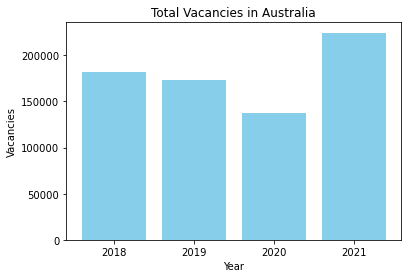

In [10]:
# Bar chart showing total job vacancies in Australia
aus_vacancy = vacancy_table.iloc[0,3:]
x_axisvacancy = np.arange(len(aus_vacancy))
plt.bar(x_axisvacancy, aus_vacancy, color='skyblue', align='center')
ticks = aus_vacancy.index
tick_locations = [value for value in x_axisvacancy]
plt.xticks(tick_locations, ticks)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Year')
plt.ylabel('Vacancies')
plt.title('Total Vacancies in Australia');

In [35]:
#Total number of job vacancies per state
# 
vacancy_per_state = vacancy_table.loc[(vacancy_table['state']!='AUST') & (vacancy_table['ANZSCO_CODE']!= '0'),:]
vac_per_state=vacancy_per_state.groupby('state')
vatot_per_state = vac_per_state.sum()
growth19_20= (vatot_per_state['2021'] - vatot_per_state['2019'])/ (vatot_per_state['2019'])*100
vatot_per_state['Growth 2019 vs 2021'] = growth19_20
vatot_per_state

,2018,2019,2020,2021,Growth 2019 vs 2021
state,,,,,
ACT,5355.666667,5717.416667,4949.250000,6606.500000,15.550438
NSW,67720.583333,61209.666667,46172.416667,71935.166667,17.522559
NT,1878.916667,1674.166667,1527.416667,2538.833333,51.647586
QLD,32683.083333,31265.583333,27437.250000,43953.416667,40.580830
SA,7671.916667,7658.083333,7185.750000,11955.916667,56.121527
TAS,1659.833333,1819.333333,1542.083333,2774.333333,52.491755
VIC,48978.416667,46984.083333,32205.333333,58317.833333,24.122531
WA,15822.250000,16001.416667,15770.500000,25445.416667,59.019774


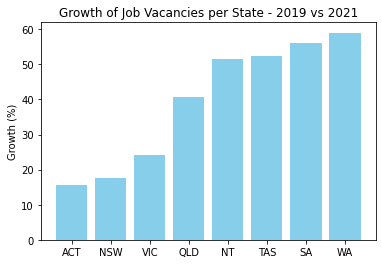

In [12]:
vatot_per_state = vatot_per_state.sort_values('Growth 2019 vs 2021')
vactotal_chart = plt.bar(vatot_per_state.index, vatot_per_state['Growth 2019 vs 2021'], color='skyblue')
plt.title('Growth of Job Vacancies per State - 2019 vs 2021')
plt.ylabel('Growth (%)');
plt.savefig('Images/Job_Vacancies_perState.png')

In [36]:
# Calculating total job vacancies per state
wa_vacancy = vacancy_per_state.loc[(vacancy_per_state['state']=='WA'),:]
wa_vacancytot = wa_vacancy.iloc[:,3:].sum()
nsw_vacancy = vacancy_per_state.loc[(vacancy_per_state['state']=='NSW'),:]
nsw_vacancytot = nsw_vacancy.iloc[:,3:].sum()
act_vacancy = vacancy_per_state.loc[(vacancy_per_state['state']=='ACT'),:]
act_vacancytot = act_vacancy.iloc[:,3:].sum()
nt_vacancy = vacancy_per_state.loc[(vacancy_per_state['state']=='NT'),:]
nt_vacancytot = nt_vacancy.iloc[:,3:].sum()
qld_vacancy = vacancy_per_state.loc[(vacancy_per_state['state']=='QLD'),:]
qld_vacancytot = qld_vacancy.iloc[:,3:].sum()
tas_vacancy = vacancy_per_state.loc[(vacancy_per_state['state']=='TAS'),:]
tas_vacancytot = tas_vacancy.iloc[:,3:].sum()
sa_vacancy = vacancy_per_state.loc[(vacancy_per_state['state']=='SA'),:]
sa_vacancytot = sa_vacancy.iloc[:,3:].sum()
vic_vacancy = vacancy_per_state.loc[(vacancy_per_state['state']=='VIC'),:]
vic_vacancytot = vic_vacancy.iloc[:,3:].sum()

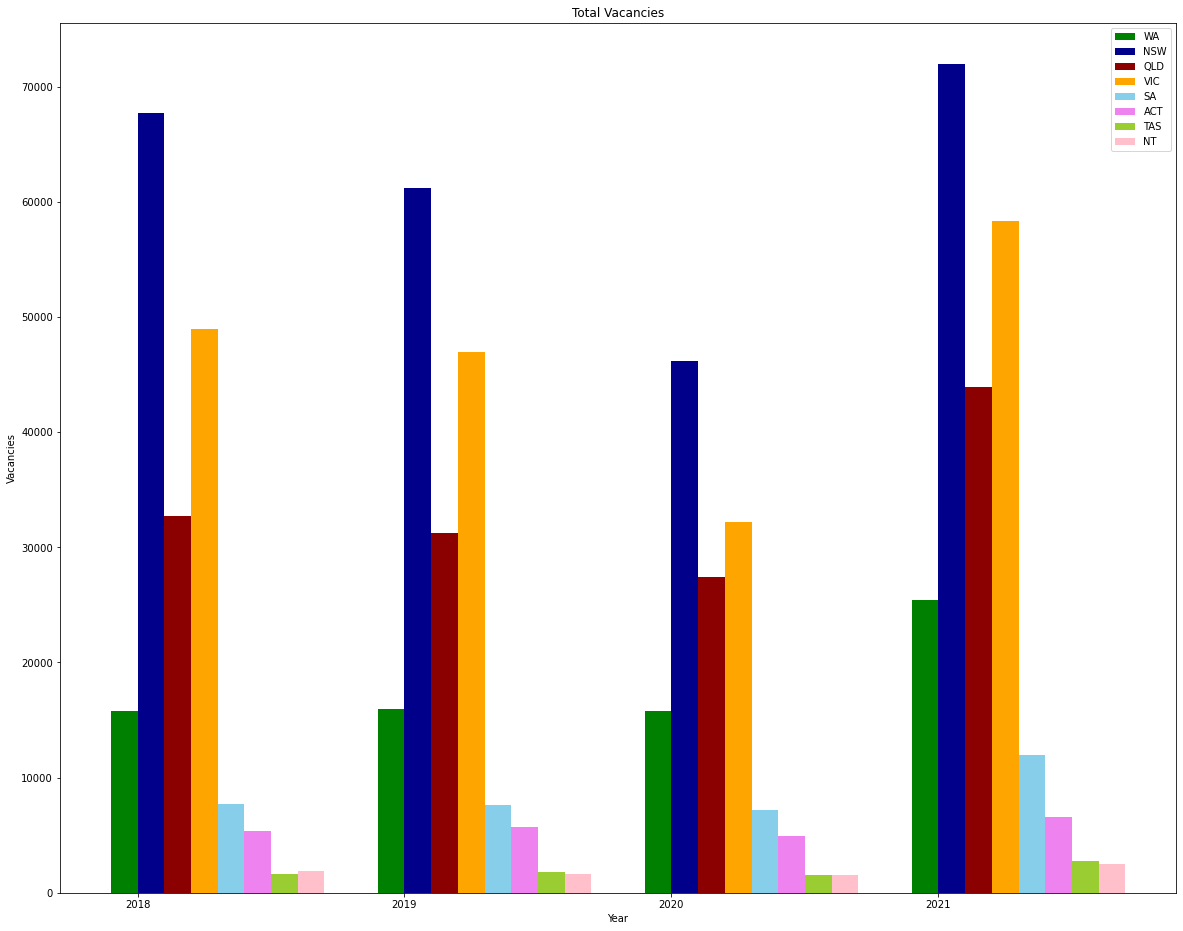

In [37]:
#Bar chart showing total job vacancies per state
N=4
ind=np.arange(N)
x_axisbar = np.arange(len(wa_vacancytot))
width = 0.10
fig,bars = plt.subplots(figsize=(20,16))

bar1=plt.bar(ind, wa_vacancytot, width=width, color='green')
bar2=plt.bar(ind+width, nsw_vacancytot, width = width, color='darkblue')
bar3=plt.bar(ind+width*2, qld_vacancytot, width = width, color='darkred')
bar4=plt.bar(ind+width*3, vic_vacancytot, width = width, color='orange')
bar5=plt.bar(ind+width*4, sa_vacancytot, width=width, color='skyblue')
bar6=plt.bar(ind+width*5, act_vacancytot, width = width, color='violet')
bar7=plt.bar(ind+width*6, tas_vacancytot, width = width, color='yellowgreen')
bar8=plt.bar(ind+width*7, nt_vacancytot, width = width, color='pink')

bars.ticklabel_format(style='plain', axis='y')
bars.set_xticks(ind + width/2)
bars.set_xticklabels(('2018','2019','2020','2021'))
plt.xlabel('Year')
plt.ylabel('Vacancies')
plt.title('Total Vacancies')
plt.legend((bar1, bar2, bar3, bar4, bar5, bar6,bar7,bar8), ('WA', 'NSW', 'QLD', 'VIC', 'SA', 'ACT', 'TAS','NT'))
plt.show()

In [38]:
# Dataframe showing top 10 with most vacancies per job position in the last 4 years
vacancy_per_jobstate = vacancy_table.loc[(vacancy_table['state']=='AUST') & (vacancy_table['ANZSCO_CODE']!= '0'),:]
vacancy_per_job = vacancy_per_jobstate.groupby('ANZSCO_TITLE')
vac_per_job = vacancy_per_job.mean()
vac_per_job.style.format("{:,.0f}")
vac_per_jobgrowth1921 = (vac_per_job['2021']- vac_per_job['2019'])/(vac_per_job['2019'])*100
vac_per_job['Growth 2019 vs 2021'] = vac_per_jobgrowth1921
vac_per_jobgrowth1821 = (vac_per_job['2021']- vac_per_job['2018'])/(vac_per_job['2018'])*100
vac_per_job['Growth 2018 vs 2021'] = vac_per_jobgrowth1821
vac_per_job.nlargest(n=10, columns=['2018','2019','2020','2021'])

,2018,2019,2020,2021,Growth 2019 vs 2021,Growth 2018 vs 2021
ANZSCO_TITLE,,,,,,
General Clerks,8690.333333,8357.083333,6299.583333,11052.333333,32.251084,27.179625
Sales Assistants (General),7487.666667,6599.833333,5360.916667,9810.500000,48.647693,31.022125
Advertising and Sales Managers,6427.416667,5803.083333,3549.250000,5343.166667,-7.925384,-16.869141
Software and Applications Programmers,6162.750000,6063.750000,4613.750000,7112.166667,17.289906,15.405731
Construction Managers,4377.666667,3794.083333,2411.916667,3772.416667,-0.571065,-13.825859
Accountants,4327.916667,3964.333333,2581.833333,3444.750000,-13.106449,-20.406277
Registered Nurses,4037.166667,4413.166667,4337.916667,7048.666667,59.719023,74.594394
Other Miscellaneous Labourers,3699.500000,3039.333333,2785.083333,4424.833333,45.585655,19.606253
ICT Business and Systems Analysts,3039.916667,2964.833333,2071.166667,3263.666667,10.079262,7.360399


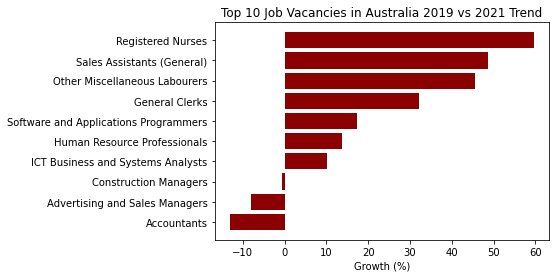

In [39]:
vac_per_jobtab = vac_per_job.nlargest(n=10, columns=['2018','2019','2020','2021'])
vac_per_jobtab = vac_per_jobtab.sort_values('Growth 2019 vs 2021')
auvac_bar = plt.barh(vac_per_jobtab.index, vac_per_jobtab['Growth 2019 vs 2021'], color='darkred')
plt.title('Top 10 Job Vacancies in Australia 2019 vs 2021 Trend')
plt.xlabel('Growth (%)');
plt.savefig('Images/Top10Job_Vacancies_Australia.png')

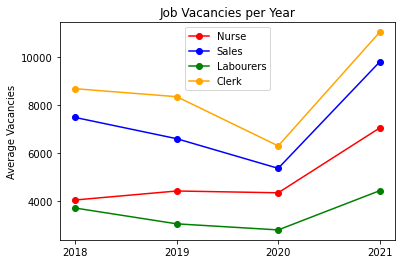

In [41]:
# Total job vacancies per year for Registered Nurses, Sales Assistants, Labourers and Clerks
reg_nurse = vacancy_per_jobstate.loc[(vacancy_per_jobstate['ANZSCO_TITLE']=='Registered Nurses'),:]
reg_nursetot = reg_nurse.iloc[:,3:].mean()


reg_sales = vacancy_per_jobstate.loc[(vacancy_per_jobstate['ANZSCO_TITLE']=='Sales Assistants (General)'),:]
reg_salestot = reg_sales.iloc[:,3:].mean()

reg_labour = vacancy_per_jobstate.loc[(vacancy_per_jobstate['ANZSCO_TITLE']=='Other Miscellaneous Labourers'),:]
reg_labourtot = reg_labour.iloc[:,3:].mean()

reg_clerk = vacancy_per_jobstate.loc[(vacancy_per_jobstate['ANZSCO_TITLE']=='General Clerks'),:]
reg_clerktot = reg_clerk.iloc[:,3:].mean()

x_axisplot = ['2018','2019','2020','2021']

plt.plot(x_axisplot, reg_nursetot, marker = 'o', color = 'red', label='Nurse')
plt.plot(x_axisplot, reg_salestot, marker = 'o', color = 'blue', label='Sales')
plt.plot(x_axisplot, reg_labourtot, marker = 'o', color = 'green', label='Labourers')
plt.plot(x_axisplot, reg_clerktot, marker = 'o', color = 'orange', label='Clerk')
plt.title('Job Vacancies per Year')
plt.ylabel('Average Vacancies')
plt.legend(loc='best')
plt.savefig('Images/Job_Vacancy_Comparison.png')

In [43]:
# Dataframe showing top 10 WA job vacancies in the last 4 years
wavacancy_per_job = vacancy_per_state.loc[vacancy_per_state['state']=='WA',:]
wavacancytop = wavacancy_per_job.nlargest(n=10, columns=['2018','2019','2020','2021'])
wavacancytop.sort_values(by=['2021'], ascending= False)

,ANZSCO_CODE,ANZSCO_TITLE,state,2018,2019,2020,2021
2041,5311,General Clerks,WA,663.333333,708.083333,671.416667,1225.333333
2073,6211,Sales Assistants (General),WA,561.833333,486.833333,547.333333,1046.916667
1953,3232,Metal Fitters and Machinists,WA,536.583333,575.000000,510.666667,672.083333
1948,3212,Motor Mechanics,WA,415.583333,446.500000,443.583333,670.500000
1917,2544,Registered Nurses,WA,311.333333,302.916667,331.416667,564.000000
2153,8999,Other Miscellaneous Labourers,WA,320.166667,302.583333,357.250000,557.166667
1951,3223,Structural Steel and Welding Trades Workers,WA,351.666667,293.416667,312.500000,495.000000
1803,1311,Advertising and Sales Managers,WA,363.583333,317.583333,245.166667,388.000000
1920,2613,Software and Applications Programmers,WA,318.083333,338.583333,277.833333,378.250000
1842,2211,Accountants,WA,332.750000,304.750000,224.750000,312.333333


In [23]:
# Dataframe showing top 10 WA job vacancies for 2021
wavacancy_per_job2021 = wavacancy_per_job[['ANZSCO_TITLE', '2021']]
wavacancy_per_job2021.sort_values('2021', ascending= False).head(10)

,ANZSCO_TITLE,2021
2041,General Clerks,1225.333333
2073,Sales Assistants (General),1046.916667
1953,Metal Fitters and Machinists,672.083333
1948,Motor Mechanics,670.500000
1917,Registered Nurses,564.000000
2153,Other Miscellaneous Labourers,557.166667
1968,Electricians,532.083333
1951,Structural Steel and Welding Trades Workers,495.000000
2108,Truck Drivers,425.333333
1875,Mining Engineers,406.250000


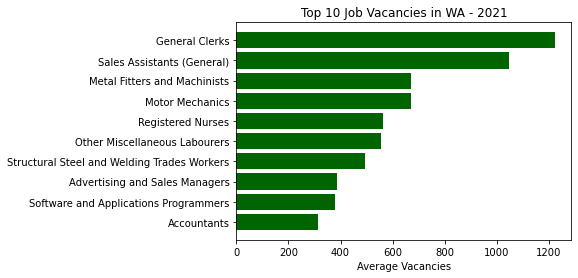

In [26]:
#Bar chart showing top 10 WA job vacancies for 2021
wavacancytop = wavacancytop.sort_values('2021')
job_bar1 = plt.barh(wavacancytop['ANZSCO_TITLE'], wavacancytop['2021'], data= wavacancytop, color='darkgreen')
plt.title('Top 10 Job Vacancies in WA - 2021');
plt.xlabel('Average Vacancies')
plt.savefig('Images/Top10_Vacancies_WA.png')

In [27]:
# Dataframe showing top 10 SA job vacancies in the last 4 years
savacancy_per_job = vacancy_per_state.loc[vacancy_per_state['state']=='SA',:]
savacancytop = savacancy_per_job.nlargest(n=10, columns=['2018','2019','2020','2021'])
savacancytop.head(10)

,ANZSCO_CODE,ANZSCO_TITLE,state,2018,2019,2020,2021
1682,5311,General Clerks,SA,385.083333,384.833333,356.750000,674.083333
1714,6211,Sales Assistants (General),SA,334.333333,317.166667,333.666667,591.333333
1558,2544,Registered Nurses,SA,239.333333,311.166667,252.000000,413.416667
1794,8999,Other Miscellaneous Labourers,SA,218.833333,210.333333,215.250000,315.416667
1561,2613,Software and Applications Programmers,SA,190.666667,208.000000,162.250000,277.583333
1589,3212,Motor Mechanics,SA,171.000000,154.833333,135.250000,224.750000
1444,1311,Advertising and Sales Managers,SA,159.583333,144.833333,118.416667,192.500000
1483,2211,Accountants,SA,142.500000,132.333333,98.333333,137.750000
1749,7331,Truck Drivers,SA,138.000000,94.833333,91.083333,154.833333
1450,1331,Construction Managers,SA,134.583333,120.250000,106.416667,186.500000


In [28]:
# Dataframe showing top 10 TAS job vacancies in the last 4 years
tasvacancy_per_job = vacancy_per_state.loc[vacancy_per_state['state']=='TAS',:]
tasvacancytop = tasvacancy_per_job.nlargest(n=10, columns=['2018','2019','2020','2021'])
tasvacancytop.head(10)

,ANZSCO_CODE,ANZSCO_TITLE,state,2018,2019,2020,2021
2400,5311,General Clerks,TAS,84.916667,96.166667,82.166667,157.250000
2276,2544,Registered Nurses,TAS,81.833333,83.750000,80.750000,146.000000
2432,6211,Sales Assistants (General),TAS,78.833333,77.416667,67.416667,133.916667
2512,8999,Other Miscellaneous Labourers,TAS,39.166667,41.583333,29.000000,53.583333
2334,3513,Chefs,TAS,37.750000,36.166667,26.166667,44.750000
2307,3212,Motor Mechanics,TAS,32.083333,37.916667,30.250000,55.166667
2162,1311,Advertising and Sales Managers,TAS,28.583333,30.000000,24.333333,44.250000
2368,4231,Aged and Disabled Carers,TAS,28.250000,33.833333,33.333333,45.666667
2187,1421,Retail Managers,TAS,25.916667,21.916667,16.916667,35.166667
2376,4315,Waiters,TAS,25.166667,22.250000,16.250000,36.250000


In [29]:
# Dataframe showing top 10 NT job vacancies in the last 4 years
ntvacancy_per_job = vacancy_per_state.loc[vacancy_per_state['state']=='NT',:]
ntvacancytop = ntvacancy_per_job.nlargest(n=10, columns=['2018','2019','2020','2021'])
ntvacancytop.head(10)

,ANZSCO_CODE,ANZSCO_TITLE,state,2018,2019,2020,2021
2759,5311,General Clerks,NT,105.666667,98.416667,82.666667,144.000000
2635,2544,Registered Nurses,NT,90.916667,70.500000,75.666667,112.916667
2791,6211,Sales Assistants (General),NT,66.750000,58.000000,47.416667,98.750000
2671,3232,Metal Fitters and Machinists,NT,50.416667,35.000000,30.500000,44.583333
2666,3212,Motor Mechanics,NT,42.583333,35.416667,30.750000,65.833333
2871,8999,Other Miscellaneous Labourers,NT,39.666667,32.750000,32.916667,50.500000
2546,1421,Retail Managers,NT,34.083333,33.250000,29.000000,42.666667
2686,3411,Electricians,NT,32.000000,29.416667,26.833333,46.166667
2527,1331,Construction Managers,NT,32.000000,24.833333,25.250000,40.500000
2693,3513,Chefs,NT,30.916667,27.916667,25.000000,43.666667


In [30]:
# Dataframe showing top 10 NSW job vacancies in the last 4 years
nswvacancy_per_job = vacancy_per_state.loc[vacancy_per_state['state']=='NSW',:]
nswvacancy_per_job.nlargest(n=10, columns=['2018','2019','2020','2021'])

,ANZSCO_CODE,ANZSCO_TITLE,state,2018,2019,2020,2021
605,5311,General Clerks,NSW,3197.000000,2811.583333,2042.583333,3405.833333
367,1311,Advertising and Sales Managers,NSW,3078.000000,2764.666667,1605.000000,2251.500000
637,6211,Sales Assistants (General),NSW,2840.583333,2393.750000,1783.750000,3006.750000
484,2613,Software and Applications Programmers,NSW,2595.583333,2427.000000,1837.416667,2836.000000
406,2211,Accountants,NSW,1831.833333,1592.750000,1006.833333,1309.000000
373,1331,Construction Managers,NSW,1824.250000,1461.583333,878.333333,1298.000000
482,2611,ICT Business and Systems Analysts,NSW,1367.083333,1257.583333,891.500000,1368.916667
411,2231,Human Resource Professionals,NSW,1289.833333,1222.500000,675.250000,1135.500000
481,2544,Registered Nurses,NSW,1220.750000,1423.916667,1629.083333,2623.666667
717,8999,Other Miscellaneous Labourers,NSW,1160.250000,925.250000,769.333333,1248.250000


In [31]:
# Dataframe showing top 10 QLD job vacancies in the last 4 years

# There was not a significant decrease on vacancies for Sales Assistants between 2019 and 2020 however there is a huge increase in demand. Looking between 2019 and 2021, there is 69% growth in vacancies.
# General Clerks had a similar trend and had 36% growth in demand between 2019 and 2021.
qldvacancy_per_job = vacancy_per_state.loc[vacancy_per_state['state']=='QLD',:]
qldvacancy_per_job.nlargest(n=10, columns=['2018','2019','2020','2021'])

,ANZSCO_CODE,ANZSCO_TITLE,state,2018,2019,2020,2021
1323,5311,General Clerks,QLD,1580.750000,1572.583333,1293.250000,2151.333333
1355,6211,Sales Assistants (General),QLD,1332.833333,1223.333333,1182.000000,2070.916667
1435,8999,Other Miscellaneous Labourers,QLD,972.333333,729.333333,768.750000,1124.916667
1199,2544,Registered Nurses,QLD,884.000000,944.916667,873.750000,1247.166667
1085,1311,Advertising and Sales Managers,QLD,798.833333,772.416667,531.916667,822.833333
1202,2613,Software and Applications Programmers,QLD,788.000000,825.250000,598.916667,933.916667
1124,2211,Accountants,QLD,706.333333,688.083333,462.500000,615.750000
1235,3232,Metal Fitters and Machinists,QLD,652.500000,583.416667,448.166667,649.666667
1091,1331,Construction Managers,QLD,610.416667,546.583333,357.333333,624.083333
1230,3212,Motor Mechanics,QLD,543.250000,471.416667,427.583333,726.250000


In [32]:
# Dataframe showing top 10 VIC job vacancies in the last 4 years
# Sales Assistants (General) decreased by 32% from 2019 - 2020 however the vacancies increased by 109% from 2020-2021
vicvacancy_per_job = vacancy_per_state.loc[vacancy_per_state['state']=='VIC',:]
vicvacancy_per_job.nlargest(n=10, columns=['2018','2019','2020','2021'])

,ANZSCO_CODE,ANZSCO_TITLE,state,2018,2019,2020,2021
964,5311,General Clerks,VIC,2337.250000,2299.250000,1436.333333,2821.333333
996,6211,Sales Assistants (General),VIC,2110.916667,1885.333333,1276.916667,2673.333333
726,1311,Advertising and Sales Managers,VIC,1872.916667,1647.083333,937.833333,1510.750000
843,2613,Software and Applications Programmers,VIC,1765.500000,1769.166667,1224.583333,2098.500000
732,1331,Construction Managers,VIC,1314.000000,1214.833333,652.666667,1027.083333
765,2211,Accountants,VIC,1164.000000,1085.916667,672.750000,932.083333
840,2544,Registered Nurses,VIC,1129.000000,1196.666667,1022.166667,1841.416667
1076,8999,Other Miscellaneous Labourers,VIC,868.000000,706.000000,541.666667,1002.250000
841,2611,ICT Business and Systems Analysts,VIC,788.916667,763.416667,476.000000,874.500000
770,2231,Human Resource Professionals,VIC,783.916667,748.166667,398.166667,873.250000


In [45]:
# Source: Australian Bureau of Statistics, Job mobility February 2021
job_change = pd.read_csv('Resources/changed_jobs_by_industry.csv')
job_change.dropna(inplace=True)
job_change

,Industry,Year ending Feb 2020,Year ending Feb 2021
0,Accommodation and food services,10.1,12.4
1,Retail trade,9.8,10.9
2,Health care and social assistance,10.8,9.5
3,"Professional, scientific and technical services",9.2,8.3
4,Construction,10.3,7.7
5,Education and training,4.9,5.7
6,Manufacturing,6.4,5.1
7,Public administration and safety,3.6,4.8
8,"Transport, postal and warehousing",4.3,4.4
9,Administrative and support services,3.7,4.0


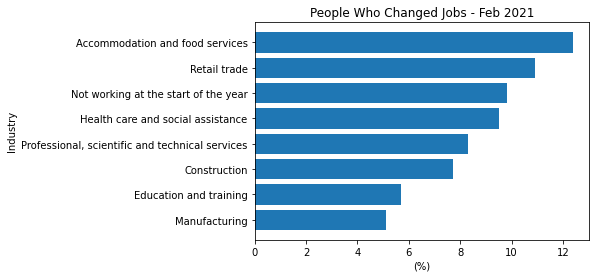

In [60]:
job_changedf = job_change.sort_values('Year ending Feb 2021')
job_changedf = job_changedf.loc[job_changedf['Year ending Feb 2021']>= 5.0,:]
plt.barh( job_changedf['Industry'], job_changedf['Year ending Feb 2021'])
plt.title('People Who Changed Jobs - Feb 2021')
plt.ylabel('Industry')
plt.xlabel('(%)')
plt.savefig('Images/Changed_jobs.png')